# RESUMO

# IMPORTANDO BIBLIOTECAS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import math
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, boxcox, yeojohnson
from scipy.special import inv_boxcox

import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMRegressor

tqdm.pandas()


**LINK DEMONSTRANDO AS COMPARAÇÕES** <br>
https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9


# CARREGANDO DADOS

In [21]:
df_train = pd.read_csv('dados/train.csv')
df_test = pd.read_csv('dados/test.csv')
df_submission = pd.read_csv('dados/sample_submission.csv')

# Distribuição da variável target

In [22]:
target_testes = df_train[['yield']]

## SEM TRANSFORMAÇÃO

<Figure size 2000x800 with 0 Axes>

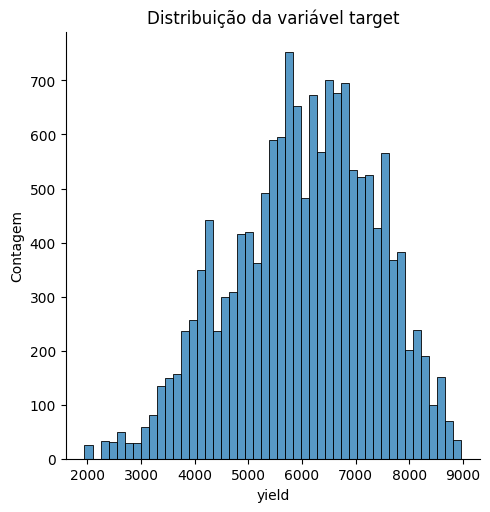

In [23]:
plt.figure(figsize=(20,8))
sns.displot(target_testes, x="yield")
plt.title('Distribuição da variável target')
plt.ylabel('Contagem')
plt.show()

In [24]:
target_testes['yield'].kurtosis()

-0.436563864726061

In [25]:
target_testes['yield'].skew()

-0.29119496049488897

## BOX-COX 
VALORES ESTRITAMENTE POSITIVOS

In [26]:
target_testes['boxcox_yield'], _ = boxcox(target_testes["yield"])

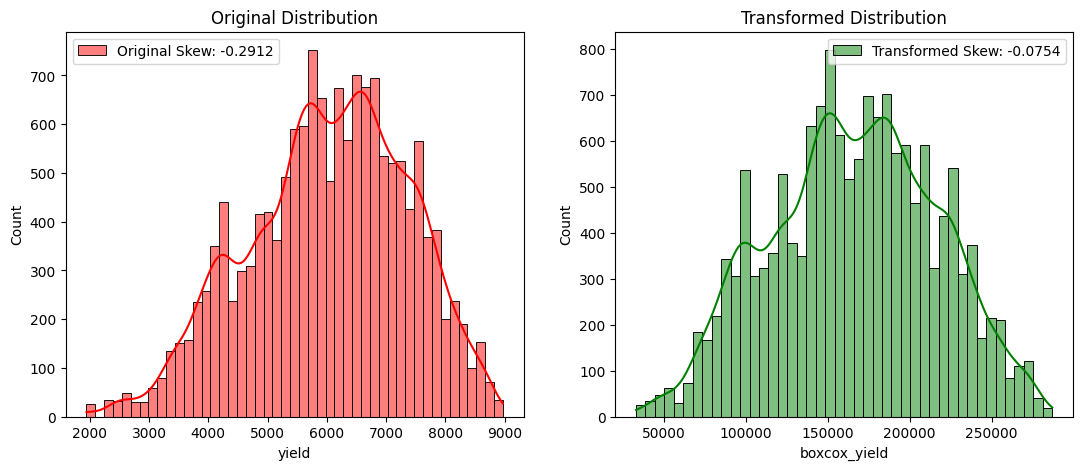

In [27]:
# Configurar o tamanho da figura
plt.rcParams["figure.figsize"] = 13, 5

# Plotar as distribuições antes e depois da transformação
fig, ax = plt.subplots(1, 2)
sns.histplot(target_testes["yield"], kde=True, color="r", label="Original Skew: {0}".format(np.round(target_testes["yield"].skew(), 4)), ax=ax[0])
sns.histplot(target_testes['boxcox_yield'], kde=True, color="g", label="Transformed Skew: {0}".format(np.round(target_testes['boxcox_yield'].skew(), 4)), ax=ax[1])

# Adicionar legendas e títulos aos gráficos
ax[0].legend()
ax[0].set_title("Original Distribution")
ax[1].legend()
ax[1].set_title("Transformed Distribution")

plt.show()

# MODELOS

In [28]:

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [29]:
lista_funcao_utilizada = []
# lista_modelo_utilizado = []
#lista_transformacao_utilizado = []
# lista_num_features = []
lista_MAE = []

## FUNÇÕES DE PERDA

In [30]:
def teste_com_kfold(funcao_perda, df):

    X = df[['clonesize', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
    y = df[['yield']]

    kf = KFold(n_splits=5, shuffle=True, random_state=10)
    MAE_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        lgbm_model = LGBMRegressor(random_state=10, objective=funcao_perda)
        lgbm_model.fit(X_train, y_train)
        y_pred = lgbm_model.predict(X_test)

        MAE = mean_absolute_error(y_true=y_test['yield'], y_pred=y_pred)
        MAE_scores.append(MAE)


    # Exibir a média e o desvio padrão dos scores de MAE
    print(f'Média dos scores de MAE: {np.mean(MAE_scores)}')
    print(f'Desvio padrão dos scores de MAE: {np.std(MAE_scores)}')

    return np.mean(MAE_scores)

In [31]:
def grafico_previsto_versus_real(funcao_perda, df):

    X = df[['clonesize', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
    y = df[['yield']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    lgbm_model = LGBMRegressor(random_state=10, objective=funcao_perda)
    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test).squeeze().tolist()



    MAE = mean_absolute_error(y_true=y_test['yield'], y_pred=y_pred)



    plt.figure(figsize=(15,8))
    sns.scatterplot(x=y_test['yield'], y=y_pred)
    plt.title('Análise das previsões x valores reais', fontsize=15, color='blue')
    plt.xlabel('Valores Reais', fontsize=12)
    plt.ylabel('Valores previstos', fontsize=12)
    plt.show()

    print(f'O ERRO OBTIDO PARA ESSA MODELAGEM: {MAE}')

### L2: regression 

In [32]:
MAE = teste_com_kfold('regression', df_train)

lista_funcao_utilizada.append('regression')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 6021.389860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 6026.077178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start tra

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 6021.311876


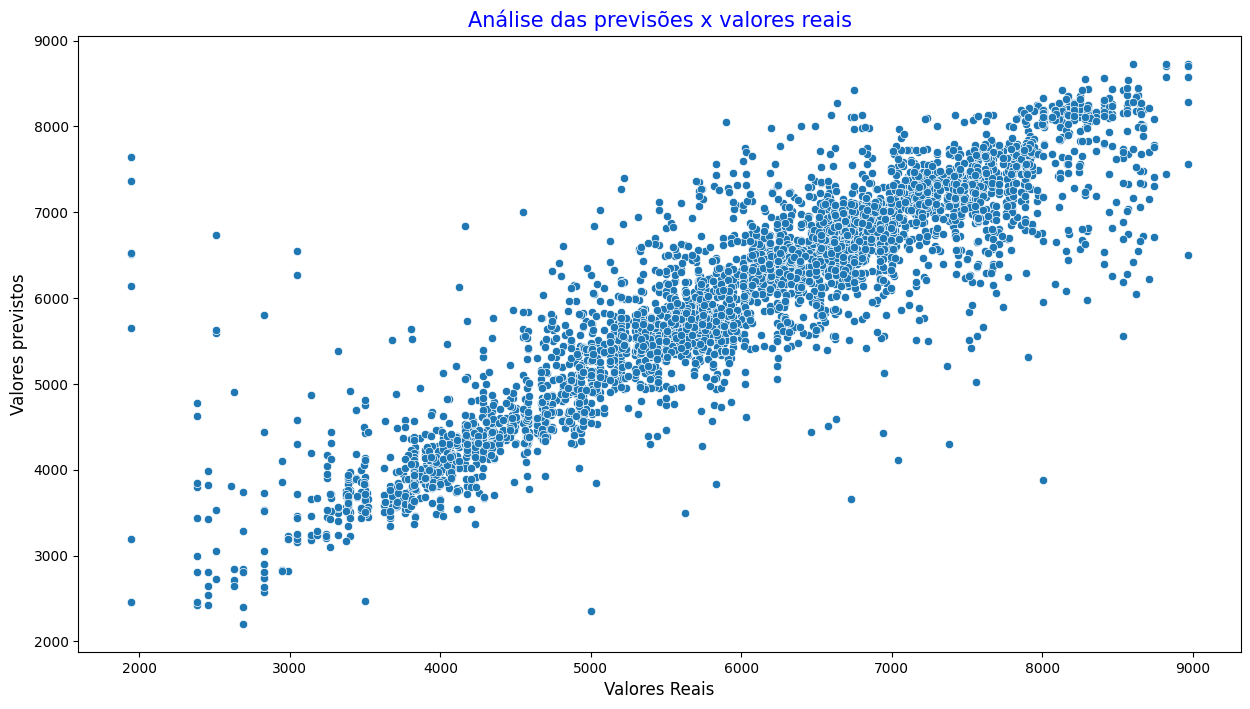

O ERRO OBTIDO PARA ESSA MODELAGEM: 354.3652072121477


In [33]:
grafico_previsto_versus_real('regression', df_train)

### L1: regression_l1

In [34]:
MAE = teste_com_kfold('regression_l1', df_train)

lista_funcao_utilizada.append('regression_l1')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 6115.947266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 6131.309570
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start tra

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 6109.850586


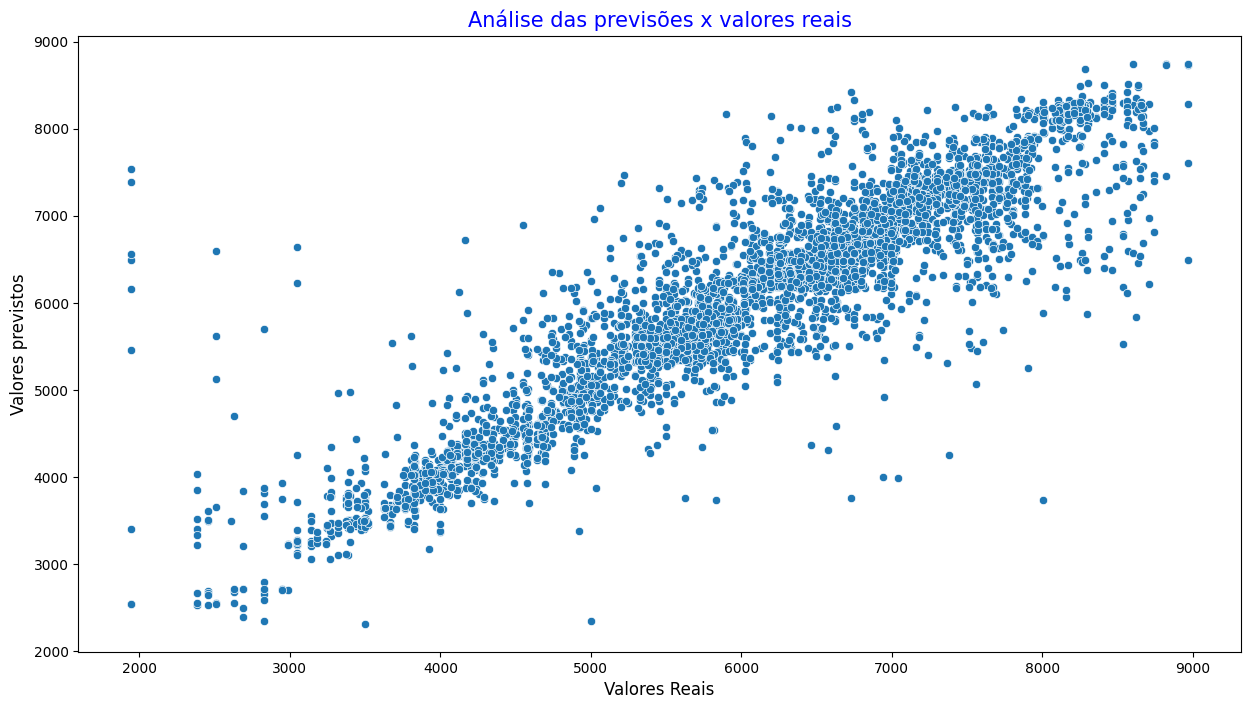

O ERRO OBTIDO PARA ESSA MODELAGEM: 339.78526525569833


In [35]:
grafico_previsto_versus_real('regression_l1', df_train)

### Huber

In [36]:
MAE = teste_com_kfold('huber', df_train)

lista_funcao_utilizada.append('huber')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 6021.389860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 6026.077178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train se

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 6021.311876


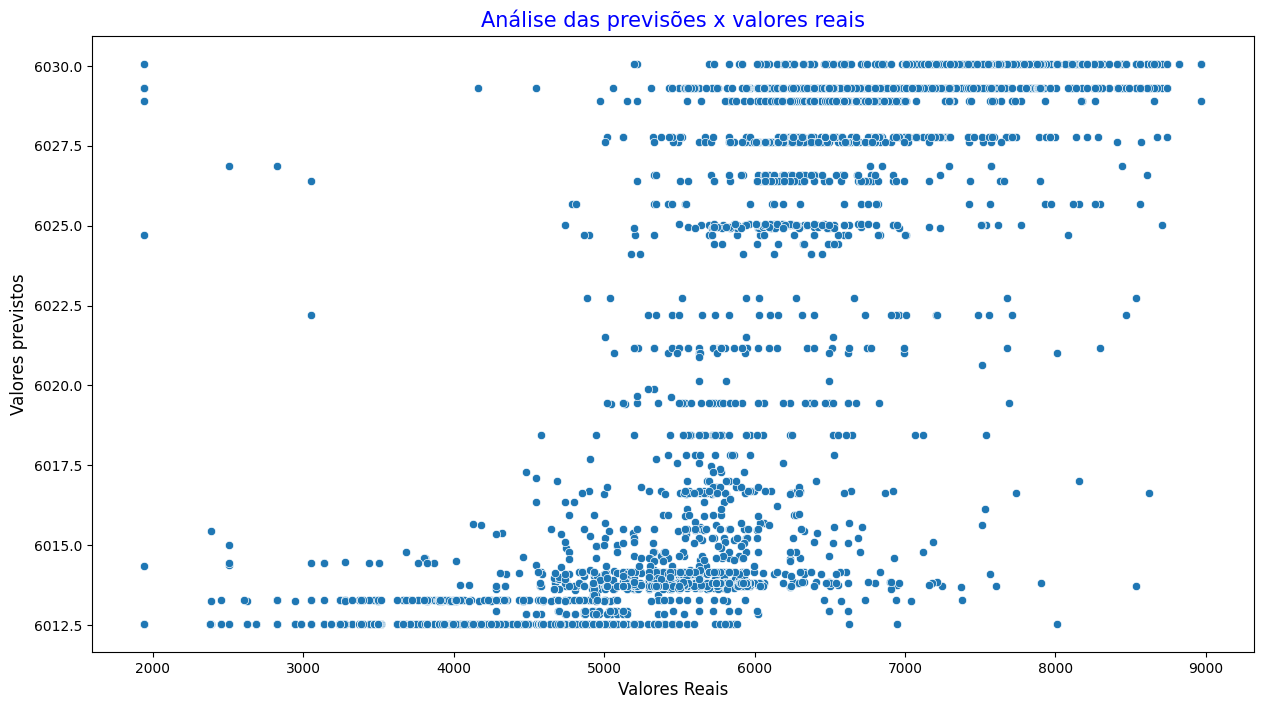

O ERRO OBTIDO PARA ESSA MODELAGEM: 1086.443196351556


In [37]:
grafico_previsto_versus_real('huber', df_train)

### Fair

In [38]:
MAE = teste_com_kfold('fair', df_train)

lista_funcao_utilizada.append('fair')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 6021.389860
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 6021.311876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

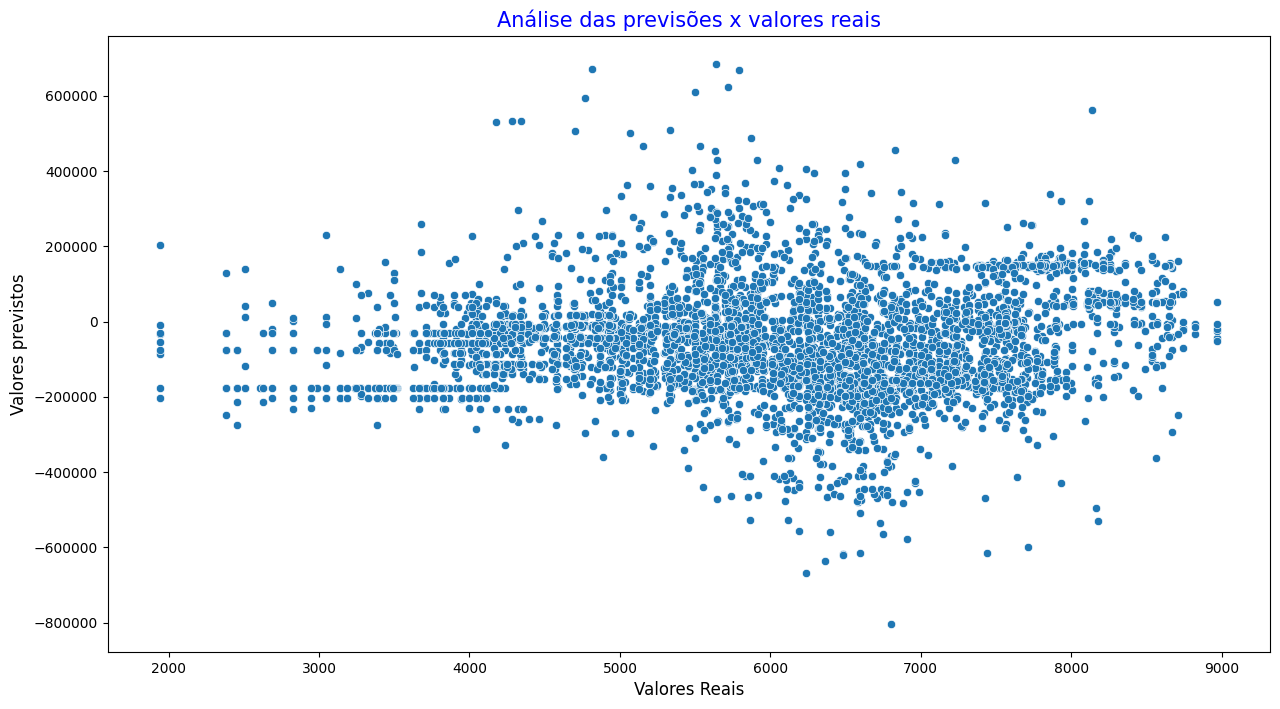

O ERRO OBTIDO PARA ESSA MODELAGEM: 120365.3158943545


In [39]:
grafico_previsto_versus_real('fair', df_train)

### Poisson

In [40]:
MAE = teste_com_kfold('poisson', df_train)

lista_funcao_utilizada.append('poisson')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 8.703073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 8.703852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 122

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 8.703060


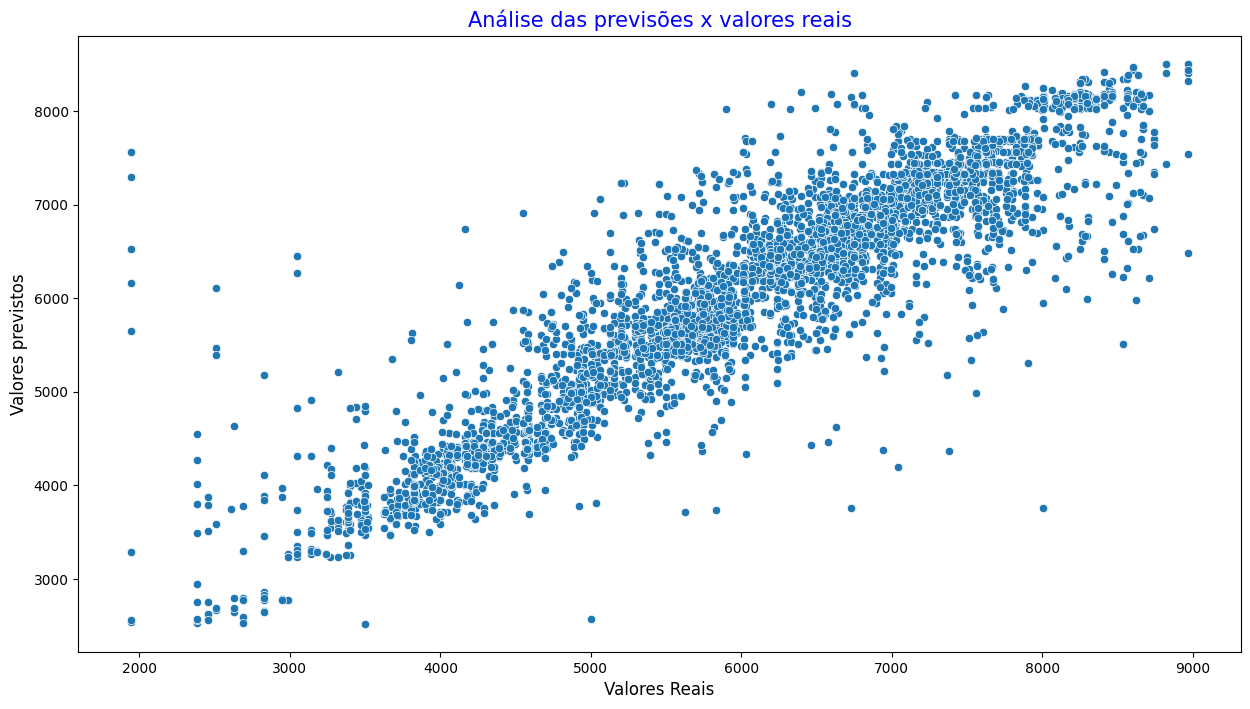

O ERRO OBTIDO PARA ESSA MODELAGEM: 351.0036474314167


In [41]:
grafico_previsto_versus_real('poisson', df_train)

### Quantile

In [42]:
MAE = teste_com_kfold('quantile', df_train)

lista_funcao_utilizada.append('quantile')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 7713.479492
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 7713.479492
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train se

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 7713.479492


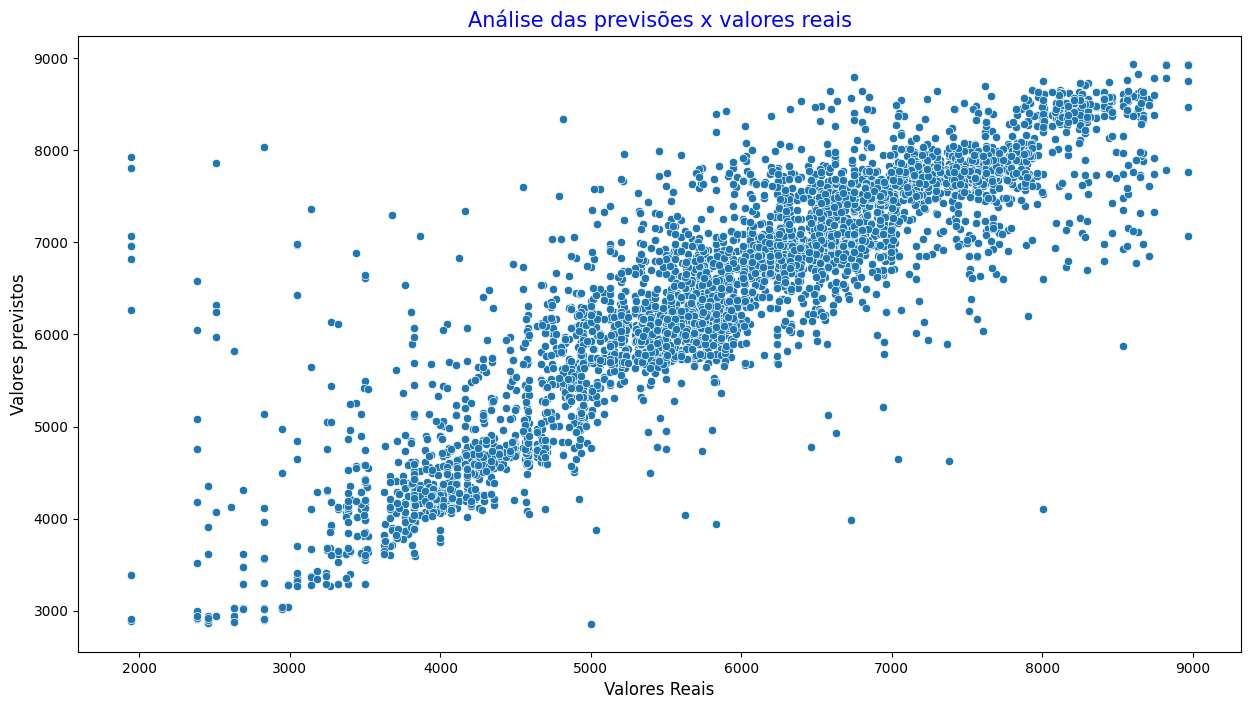

O ERRO OBTIDO PARA ESSA MODELAGEM: 603.9635070965433


In [43]:
grafico_previsto_versus_real('quantile', df_train)

### MAPE

In [44]:
MAE = teste_com_kfold('mape', df_train)

lista_funcao_utilizada.append('mape')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 5729.714844
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 5735.132812
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start tra

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 5729.714844


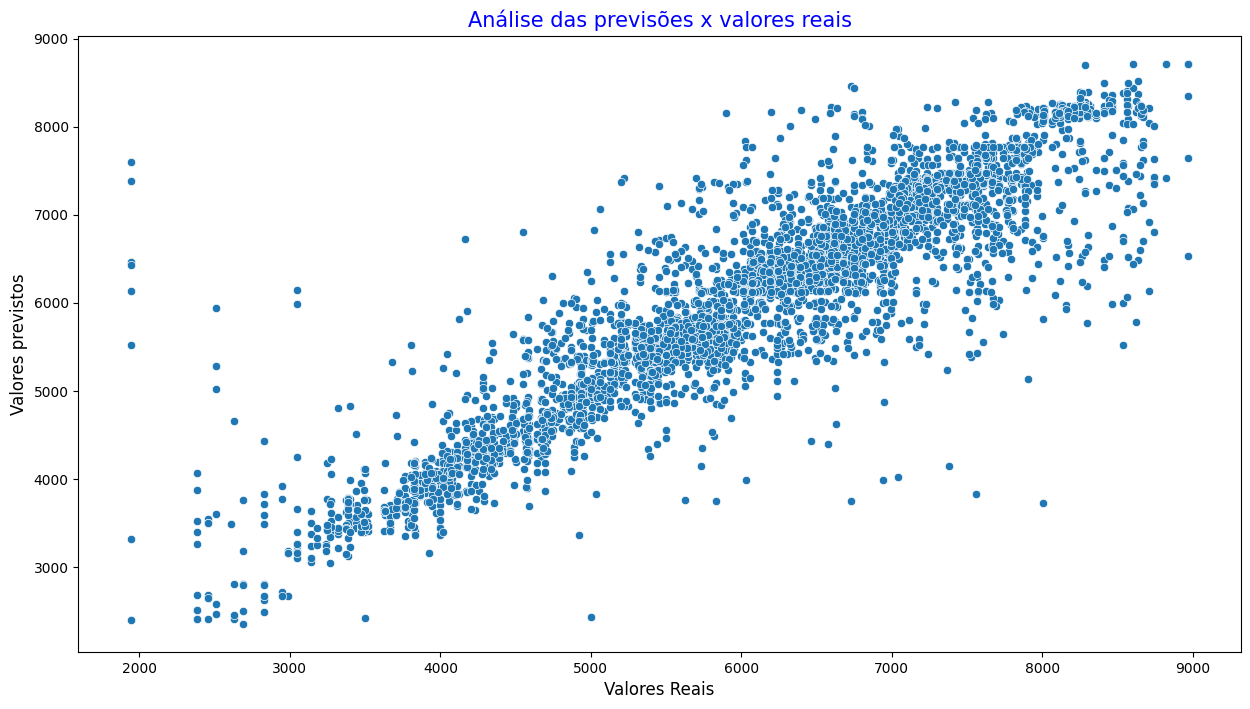

O ERRO OBTIDO PARA ESSA MODELAGEM: 343.0057432485421


In [45]:
grafico_previsto_versus_real('mape', df_train)

### GAMMA

In [46]:
MAE = teste_com_kfold('gamma', df_train)

lista_funcao_utilizada.append('gamma')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 8.703073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 8.703852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 8.703060


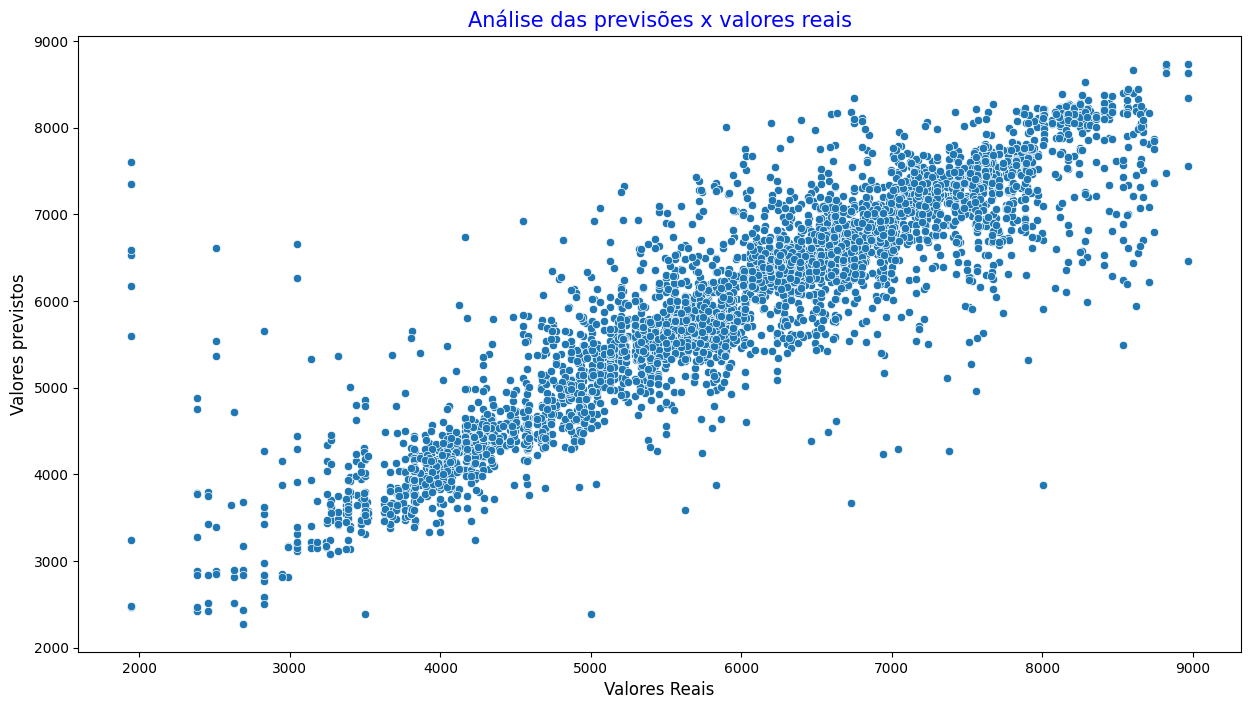

O ERRO OBTIDO PARA ESSA MODELAGEM: 352.8932916271676


In [47]:
grafico_previsto_versus_real('gamma', df_train)

### Tweedie

In [48]:
MAE = teste_com_kfold('tweedie', df_train)

lista_funcao_utilizada.append('tweedie')
lista_MAE.append(MAE)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 8.703073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 12231, number of used features: 6
[LightGBM] [Info] Start training from score 8.703852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 122

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 10702, number of used features: 6
[LightGBM] [Info] Start training from score 8.703060


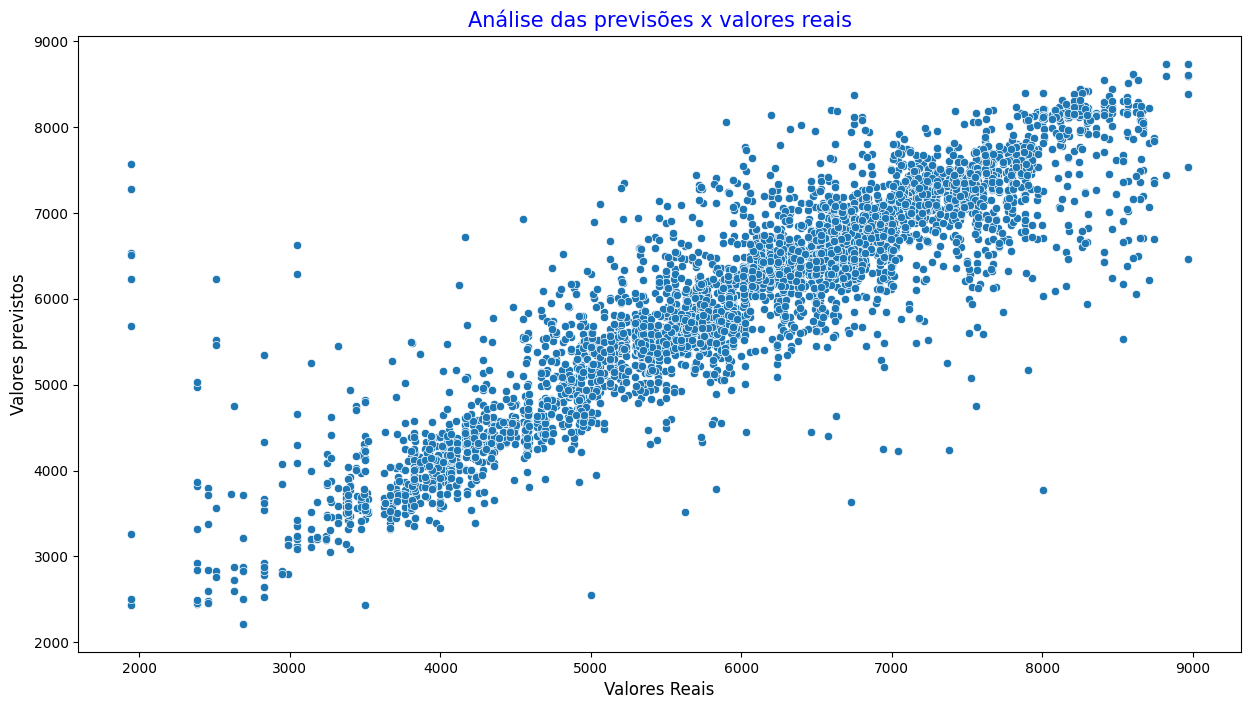

O ERRO OBTIDO PARA ESSA MODELAGEM: 353.5407878262851


In [49]:
grafico_previsto_versus_real('tweedie', df_train)

# Resultados

In [50]:
resultados_modelos = pd.DataFrame({
    'FUNÇÃO DE PERDA': lista_funcao_utilizada,
#    'TRANSFORMAÇÃO':lista_transformacao_utilizado,
#    'NUM_FEATURES':lista_num_features,
    'MAE':lista_MAE})

resultados_modelos.sort_values(by='MAE')

,FUNÇÃO DE PERDA,MAE
1,regression_l1,345.596303
6,mape,347.708267
4,poisson,356.699097
8,tweedie,356.977391
0,regression,357.014904
7,gamma,357.767418
5,quantile,599.398192
2,huber,1085.705972
3,fair,220119.526451
